In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [4]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2370 files belonging to 5 classes.


In [5]:
class_names = dataset.class_names
class_names

['Bach', 'Duy', 'Hien', 'Thanh', 'Thuc']

In [6]:
len(dataset)

75

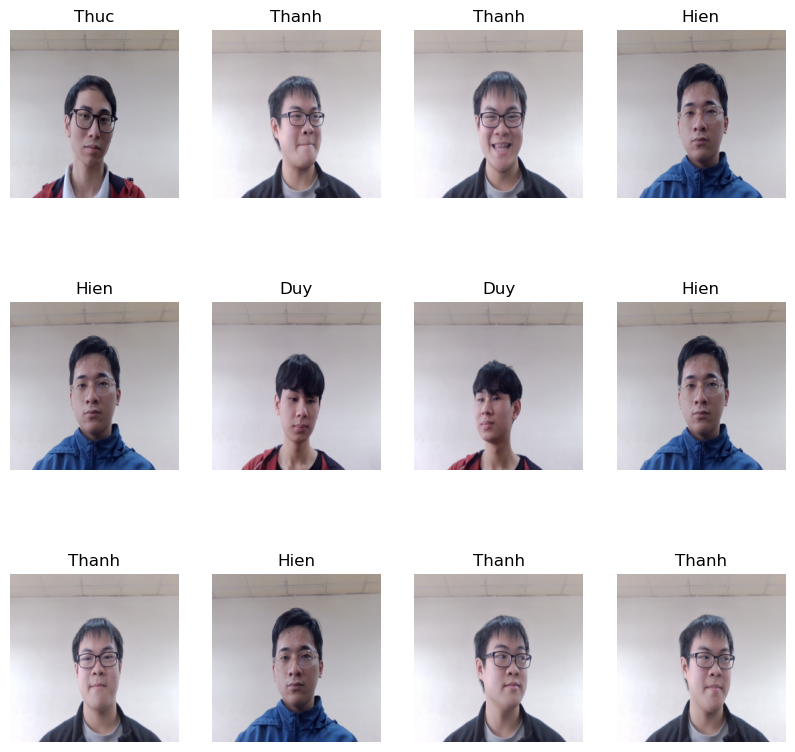

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
train_size= 0.8

In [9]:
len(dataset)*0.8

60.0

In [11]:
train_ds = dataset.take(60)
len(train_ds)

60

In [12]:
test_ds = dataset.skip(60)
len(test_ds)

15

In [13]:
val_ds = test_ds.take(7)
len(val_ds)

7

In [14]:
test_ds=test_ds.skip(7)

In [15]:
len(test_ds)

8

In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [17]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
60/60 [==============================] - 127s 2s/step - loss: 0.9365 - accuracy: 0.6135 - val_loss: 0.2922 - val_accuracy: 0.9241
Epoch 2/50
60/60 [==============================] - 111s 2s/step - loss: 0.1150 - accuracy: 0.9677 - val_loss: 0.0850 - val_accuracy: 0.9732
Epoch 3/50
60/60 [==============================] - 122s 2s/step - loss: 0.0525 - accuracy: 0.9844 - val_loss: 0.1414 - val_accuracy: 0.9554
Epoch 4/50
60/60 [==============================] - 128s 2s/step - loss: 0.0398 - accuracy: 0.9859 - val_loss: 0.0340 - val_accuracy: 0.9911
Epoch 5/50
60/60 [==============================] - 117s 2s/step - loss: 0.0464 - accuracy: 0.9833 - val_loss: 0.0657 - val_accuracy: 0.9866
Epoch 6/50
60/60 [==============================] - 120s 2s/step - loss: 0.0727 - accuracy: 0.9818 - val_loss: 0.0423 - val_accuracy: 0.9911
Epoch 7/50
60/60 [==============================] - 113s 2s/step - loss: 0.0214 - accuracy: 0.9948 - val_loss: 0.0552 - val_accuracy: 0.9732
Epoch 8/50
60

60/60 [==============================] - 93s 2s/step - loss: 1.7877e-05 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9955
Epoch 42/50
60/60 [==============================] - 90s 2s/step - loss: 0.0525 - accuracy: 0.9896 - val_loss: 0.0312 - val_accuracy: 0.9955
Epoch 43/50
60/60 [==============================] - 93s 2s/step - loss: 0.0132 - accuracy: 0.9953 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 44/50
60/60 [==============================] - 100s 2s/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0751 - val_accuracy: 0.9821
Epoch 45/50
60/60 [==============================] - 97s 2s/step - loss: 0.0083 - accuracy: 0.9969 - val_loss: 0.0295 - val_accuracy: 0.9866
Epoch 46/50
60/60 [==============================] - 86s 1s/step - loss: 0.0330 - accuracy: 0.9927 - val_loss: 0.1839 - val_accuracy: 0.9107
Epoch 47/50
60/60 [==============================] - 91s 2s/step - loss: 0.0253 - accuracy: 0.9974 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 48/50
60/60 [=

NameError: name 'acc' is not defined

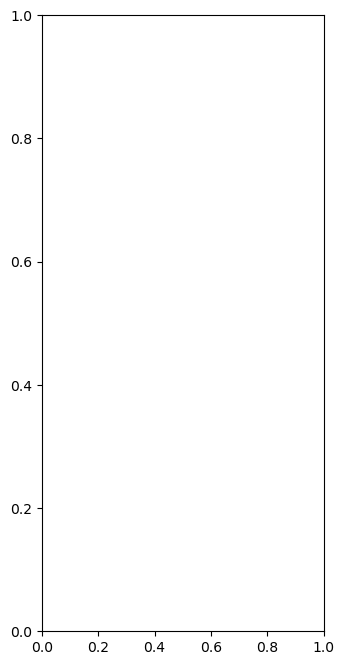

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

In [23]:
scores= model.evaluate(test_ds)

8/8 [==============================] - 4s 249ms/step - loss: 0.0190 - accuracy: 0.9912


In [24]:
acc = history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss= history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Accuracy')

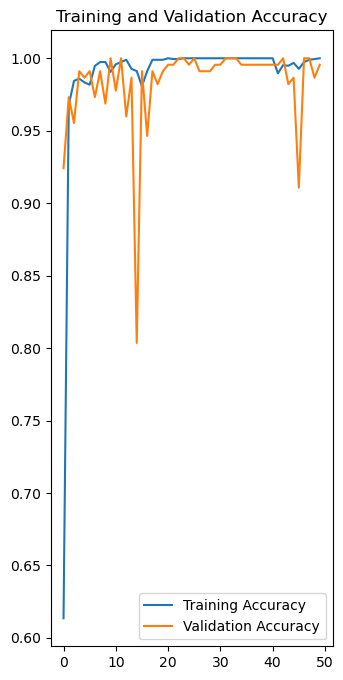

In [25]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

first image to predict
first image's actual label: Bach
1/1 [==============================] - 1s 722ms/step
predicted label: Bach


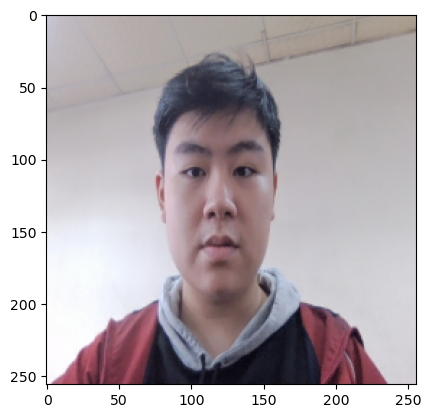

In [26]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label:" ,class_names[np.argmax(batch_prediction[0])])

In [30]:
import cv2
import matplotlib.pyplot as plt

In [39]:
img = cv2.imread("./image_70240.jpg")


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

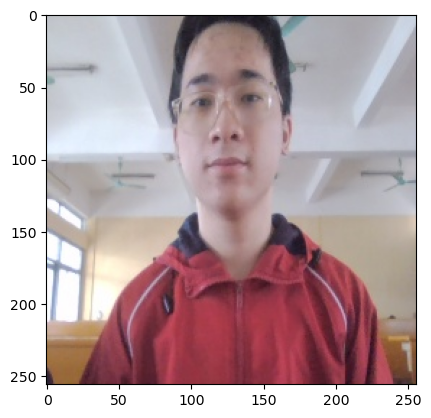

In [41]:
plt.imshow(img[:,:,::-1])

In [37]:
label = model.predict(img)
print("predicted label:" ,class_names[np.argmax(label)])

ValueError: in user code:

    File "C:\Users\PhongHoang\anaconda3\envs\gametrick\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\PhongHoang\anaconda3\envs\gametrick\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\PhongHoang\anaconda3\envs\gametrick\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\PhongHoang\anaconda3\envs\gametrick\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\PhongHoang\anaconda3\envs\gametrick\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\PhongHoang\anaconda3\envs\gametrick\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (256, 256, 3)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 256, 3), dtype=uint8)
      • training=False
      • mask=None


In [46]:
img_batch = np.expand_dims(img, 0)
predictions = model.predict(img_batch)
predicted_class = class_names[np.argmax(predictions[0])]

1/1 [==============================] - 0s 47ms/step


In [47]:
print(predicted_class)

Thanh


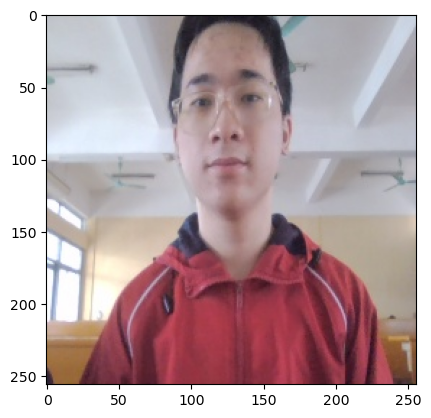

In [49]:
plt.imshow(img[:,:,::-1])

In [50]:
img=img/255.0

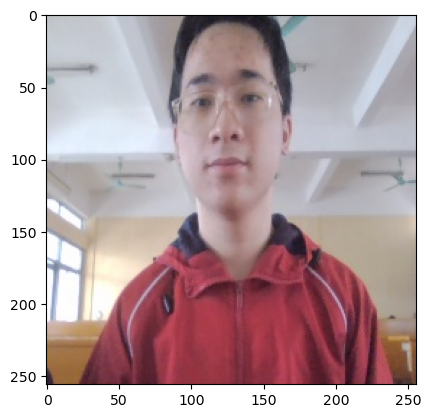

In [51]:
plt.imshow(img[:,:,::-1])

In [52]:
img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

# Chuẩn hóa dữ liệu của ảnh
img = img / 255.0


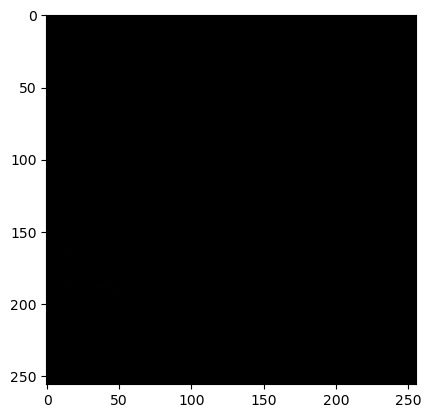

In [53]:
plt.imshow(img[:,:,::-1])

In [54]:
img_batch = np.expand_dims(img, 0)
predictions = model.predict(img_batch)
predicted_class = class_names[np.argmax(predictions[0])]

1/1 [==============================] - 0s 234ms/step


In [55]:
print(predicted_class)

Thuc


In [56]:
img = img * 255.0

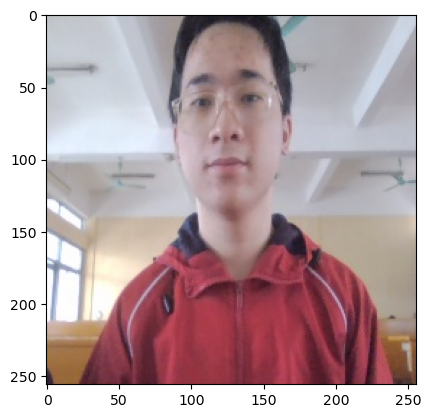

In [57]:
plt.imshow(img[:,:,::-1])

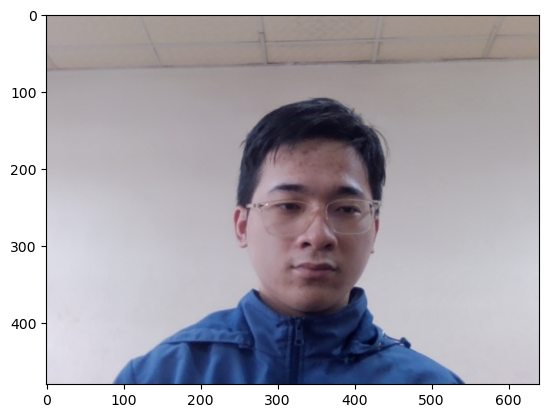

In [58]:
Hien = cv2.imread("./image_5240.jpg")
plt.imshow(Hien[:,:,::-1])

In [59]:
img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

# Chuẩn hóa dữ liệu của ảnh
img = img / 255.0

# Mở rộng số chiều của ảnh để phù hợp với số chiều đầu vào của mô hình
img = np.expand_dims(img, axis=0)

In [60]:
print("Kích thước của ảnh sau khi chuẩn bị:", img.shape)


Kích thước của ảnh sau khi chuẩn bị: (1, 256, 256, 3)


In [62]:
predictions = model.predict(img)

# Chuyển kết quả dự đoán thành dạng nhãn
predicted_class = np.argmax(predictions)

# In kết quả dự đoán
print("Nhãn dự đoán:", class_names[predicted_class])

1/1 [==============================] - 0s 31ms/step
Nhãn dự đoán: Thuc


In [64]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0) #creat a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


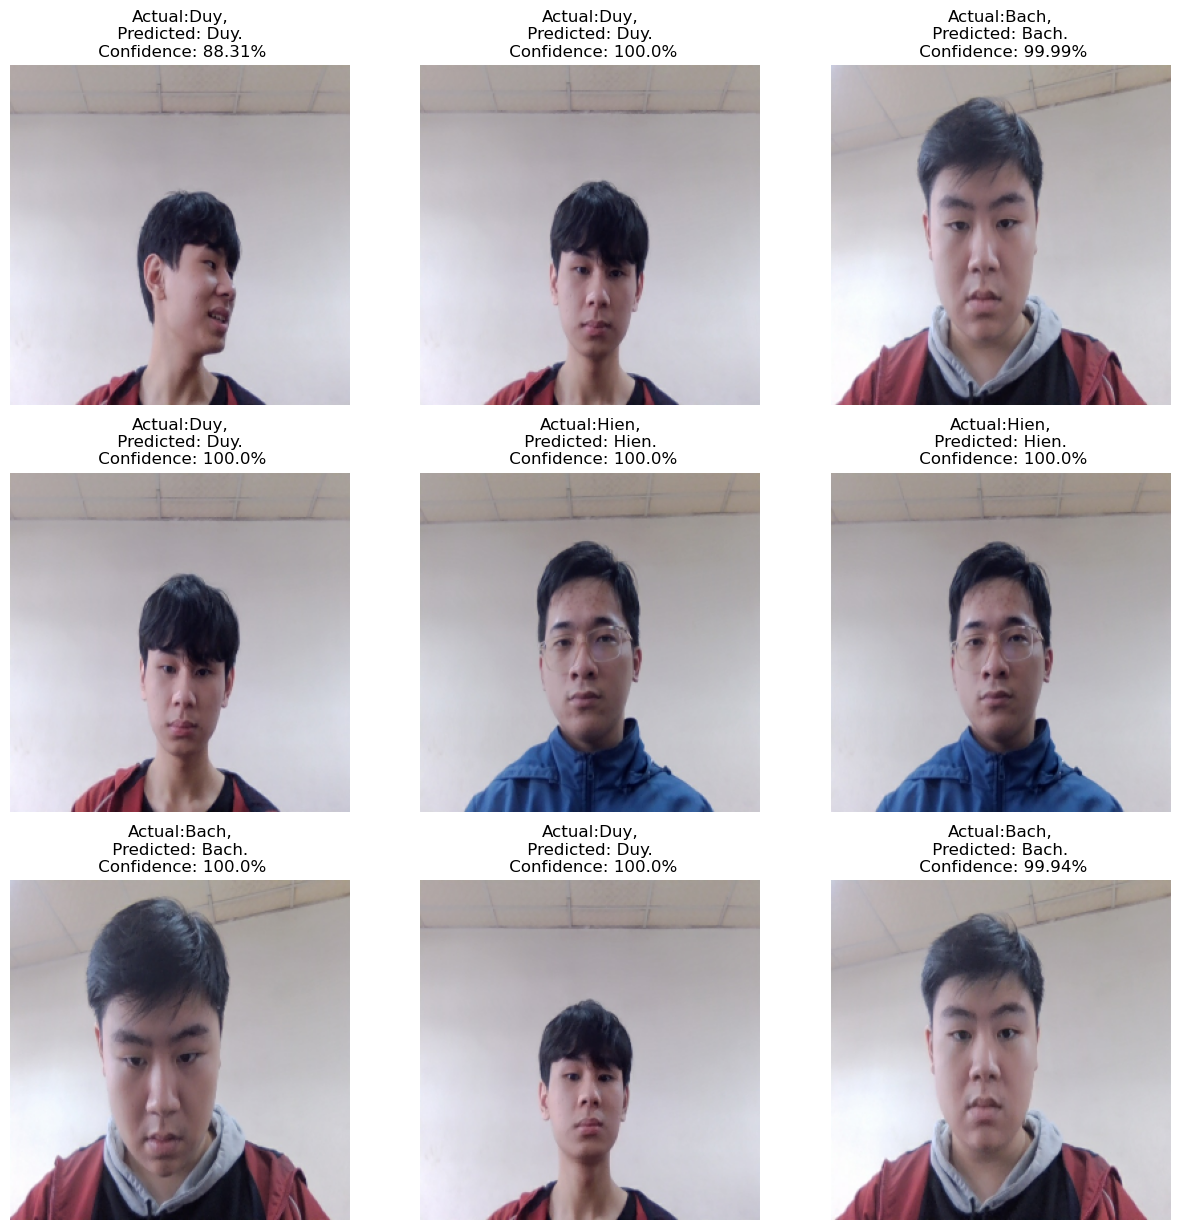

In [65]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")

In [66]:
predict(model,Hien)

1/1 [==============================] - 0s 457ms/step


('Thuc', 99.7)

In [67]:
Hien2 = cv2.imread("image_5240.jpg")

In [68]:
Hien2.shape

(480, 640, 3)

In [69]:
Hien2 = cv2.resize(Hien2, (IMAGE_SIZE, IMAGE_SIZE))

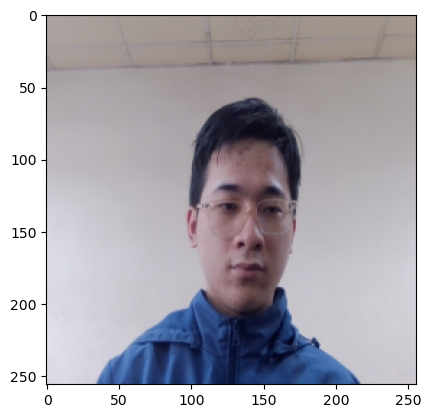

In [70]:
plt.imshow(Hien2[:,:,::-1])

In [71]:
Hien2.shape

(256, 256, 3)

In [72]:
predict(model,Hien2)

1/1 [==============================] - 0s 47ms/step


('Thuc', 99.71)

In [73]:
Hien3 = cv2.imread("image_10.jpg")

In [74]:
Hien3 = cv2.resize(Hien3, (IMAGE_SIZE, IMAGE_SIZE))

In [75]:
predict(model,Hien3)

1/1 [==============================] - 0s 47ms/step


('Thuc', 99.76)

In [133]:
tesst = dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6 files belonging to 1 classes.


ValueError: not enough values to unpack (expected 2, got 1)

In [134]:
test_class_name = tesst.class_names

1/1 [==============================] - 0s 63ms/step


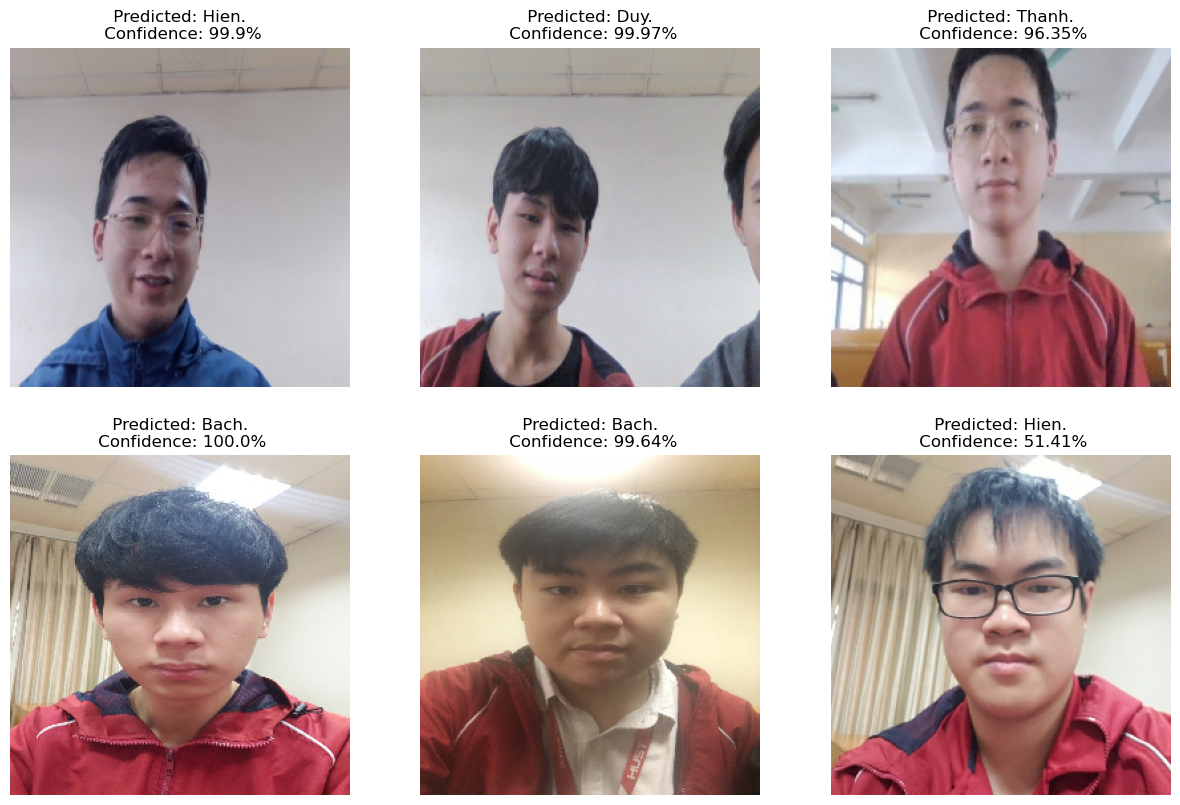

In [135]:
plt.figure(figsize=(15,15))
for images, labels in tesst.take(1):
    for i in range(6):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        
        plt.title(f" Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")

In [129]:
import cv2

# Đọc vào ảnh
img = cv2.imread("Thanh.jpg")

# Resize ảnh về kích cỡ 640x480
resized_img = cv2.resize(img, (640, 480))

# Lưu ảnh đã resize
cv2.imwrite("Thanh.jpg", resized_img)

True